# Anuran Calls, Clustering and Classification


#### Number of Instances (records in your data set): 7195
#### Number of Attributes (fields within each record): 22 + 3

Acoustic features extracted from syllables of anuran (frogs) calls, including the family, the genus, and the species labels. From every extracted syllable 22 MFCCs were calculated. Using these columns containing information about these mfcc's we will try to see how the data looks and will try to use clustering algorihtms to look for the cluster in this data set and will look if it is possible to classify these frogs if the mfcc's of a frog call was given to us.

#####                                                                                                                                                                                     Author of the notebook : Debjit Paria 

In [1]:
import pandas as pd
import csv
import numpy as np 


df = pd.read_csv('Frogs_MFCCs.csv')

print(df.head(1))


   MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0       1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   

   MFCCs_ 8  MFCCs_ 9  MFCCs_10    ...     MFCCs_17  MFCCs_18  MFCCs_19  \
0 -0.150063 -0.171128  0.124676    ...    -0.108351 -0.077623 -0.009568   

   MFCCs_20  MFCCs_21  MFCCs_22           Family      Genus         Species  \
0  0.057684   0.11868  0.014038  Leptodactylidae  Adenomera  AdenomeraAndre   

   RecordID  
0         1  

[1 rows x 26 columns]


In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X= df.iloc[:,range(0,22)]
X_scaled = scaler.fit_transform(X)

y = df['Species']
y_actual = y
le = preprocessing.LabelEncoder()
le.fit(y)

y = np.array(le.transform(y))

## Visualizing the data using tsne

### Original Data

In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

model = TSNE(learning_rate=100)

transformed = model.fit_transform(X)
tsne_data = pd.DataFrame(transformed)


matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(tsne_data)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y_actual
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj ,fit_reg=False)
print("ready")

ready


### Scaled Data

ready


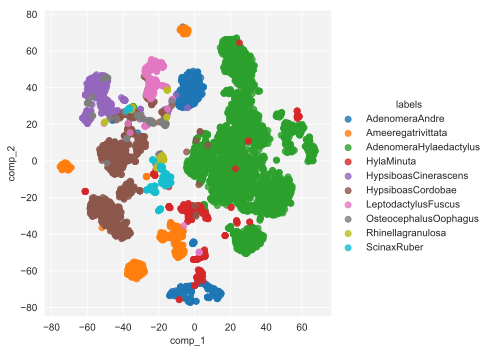

In [4]:
scaled_transformed = model.fit_transform(X_scaled)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(scaled_transformed)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y_actual
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj ,fit_reg=False)
print("ready")

## Analysing the best number of clusters

### K-means and silhouette score graph on original data

Text(0.5,1,'Elbow')

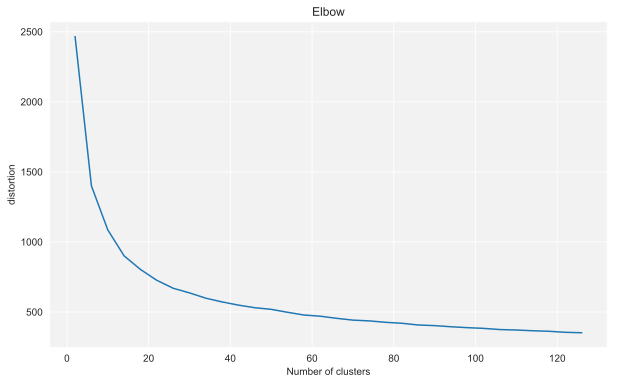

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.metrics import silhouette_score
from matplotlib.pyplot import figure
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

figure(figsize=(10,6))

n_clusters = 2

xa = []
ya = []
acc = []
while(n_clusters <= 126):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 1)
    kmeans.fit(X)
    prediction= kmeans.predict(X)
    
    labels = np.zeros_like(prediction)
    
    for i in range(n_clusters):
        mask = (prediction == i)
        labels[mask] = mode(y[mask])[0]
    
    ac = kmeans.inertia_
        
    xa.append(ac)
    ya.append(n_clusters)
    acc.append(accuracy_score(y, labels))
    
    n_clusters = n_clusters + 4

plt.plot(ya, xa)
plt.xlabel('Number of clusters')
plt.ylabel('distortion')
plt.title("Elbow")


### K-means and silhouette score graph on scaled data

Text(0.5,1,'Elbow')

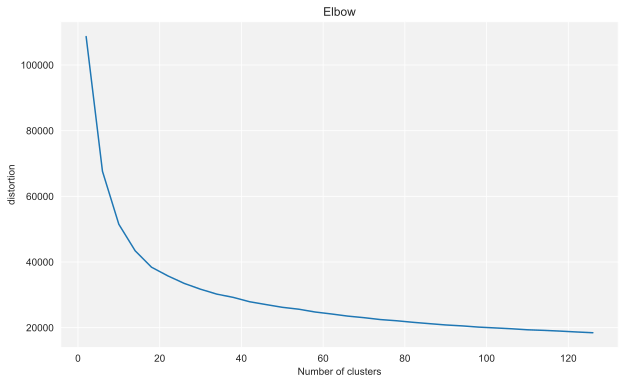

In [6]:
n_clusters = 2

xa = []
ya = []
acc = []
while(n_clusters <= 126):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 1)
    kmeans.fit(X_scaled)
    prediction= kmeans.predict(X_scaled)
    
    labels = np.zeros_like(prediction)
    
    for i in range(n_clusters):
        mask = (prediction == i)
        labels[mask] = mode(y[mask])[0]
    
    ac = kmeans.inertia_
        
    xa.append(ac)
    ya.append(n_clusters)
    acc.append(accuracy_score(y, labels))
    
    n_clusters = n_clusters + 4
figure(figsize=(10,6))
plt.plot(ya, xa)
plt.xlabel('Number of clusters')
plt.ylabel('distortion')
plt.title("Elbow")


### K-means and silhouette score graph on scaled and transformed tsne data.

Text(0.5,1,'Elbow')

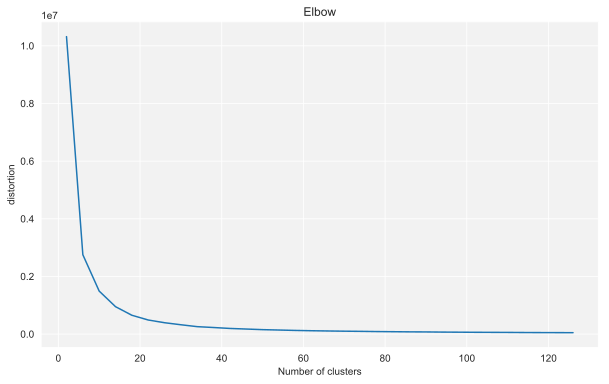

In [7]:
n_clusters = 2

xa = []
ya = []
acc = []
while(n_clusters <= 126):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 1)
    kmeans.fit(scaled_transformed)
    tsne_prediction= kmeans.predict(scaled_transformed)

    labels = np.zeros_like(tsne_prediction)
    
    for i in range(n_clusters):
        mask = (prediction == i)
        labels[mask] = mode(y[mask])[0]
    
    ac = kmeans.inertia_
        
    xa.append(ac)
    ya.append(n_clusters)
    acc.append(accuracy_score(y, labels))
    
    n_clusters = n_clusters + 4
figure(figsize=(10,6))
plt.plot(ya, xa)
plt.xlabel('Number of clusters')
plt.ylabel('distortion')
plt.title("Elbow")


## Conclusion for the best cluster range 

Looking at the three graphs of silhouette score we can say that it is somewhere between 15 and 40. 
As looking at the graphs tells us that after 40 the graph is almost stable.

So lets look at the graph of silhouette score n_clusters in between 15 and 40.

Text(0.5,1,'Silhouette Score(Bold) and Number of different labels(Dashed) v/s number of clusters')

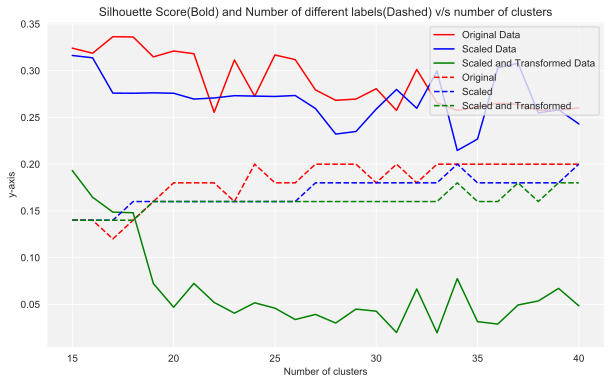

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.metrics import silhouette_score


def k_means(n_c, X):
    
    kmeans = KMeans(n_clusters = n_c, random_state = 1)
    kmeans.fit(X)
    prediction= kmeans.predict(X)
    
    labels = np.zeros_like(prediction)
    
    for i in range(n_c):
        mask = (prediction == i)
        labels[mask] = mode(y[mask])[0]
    A = np.unique(labels)

    return [silhouette_score(X, labels, metric='euclidean'), A.shape]
    
x_org = []
x_sc = []
x_tsne = []
y_in = []

l_org = []
l_sc = []
l_tsne = []
n_clusters = 15

while(n_clusters <= 40):
    
    y_in.append(n_clusters)
    x_org.append(k_means(n_clusters, X)[0])
    x_sc.append(k_means(n_clusters, X_scaled)[0])
    x_tsne.append(k_means(n_clusters, transformed)[0])
    
    l_org.append(k_means(n_clusters, X)[1])
    l_sc.append(k_means(n_clusters, X_scaled)[1])
    l_tsne.append(k_means(n_clusters, transformed)[1])
    
    n_clusters = n_clusters + 1
    
figure(figsize=(10,6))
plt.plot(y_in, x_org, color = 'r', label = 'Original Data')
plt.plot(y_in, x_sc, color = 'b', label = 'Scaled Data')
plt.plot(y_in, x_tsne, color = 'g', label = 'Scaled and Transformed Data')


plt.plot(y_in, 0.02*np.array(l_org), '--', color = 'r', label = 'Original')
plt.plot(y_in, 0.02*np.array(l_sc), '--', color = 'b', label = 'Scaled')
plt.plot(y_in, 0.02*np.array(l_tsne), '--', color = 'g', label = 'Scaled and Transformed')

plt.legend(loc='upper right')
plt.xlabel('Number of clusters')
plt.ylabel('y-axis')
plt.title("Silhouette Score(Bold) and Number of different labels(Dashed) v/s number of clusters")


Text(0.5,1,'Different Labels v/s shilhouette score')

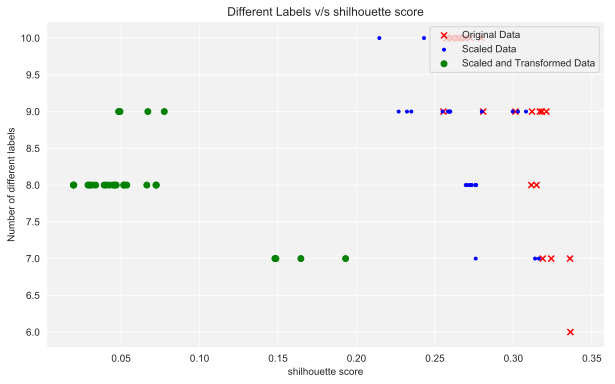

In [9]:
figure(figsize=(10,6))
plt.scatter(x_org, l_org, color = 'r', label = 'Original Data', marker = 'x')
plt.scatter(x_sc, l_sc, color = 'b', label = 'Scaled Data', marker = '.')
plt.scatter(x_tsne, l_tsne, color = 'g', label = 'Scaled and Transformed Data')

plt.legend(loc='upper right')
plt.xlabel('shilhouette score')
plt.ylabel('Number of different labels')
plt.title("Different Labels v/s shilhouette score")

## Observation about number of clusters


#### Scaled Data : Looking at the above graph we can say that there is a point where shilhouette score is above 0.300 as well as number of different labels is 9. We can infer from the shilhouette score graph and Different Labels graphs that number of optimal cluster is 33 or 37.

#### Original Data : We want the shilhouette score as well as different number of cluster to be high. Looking at the above graph we can say that there is a point where shilhouette score is near 0.325 as well as number of different labels is 9. We can infer from the shilhouette score graph and Different Labels graphs that number of optimal cluster is 20 or 25.

#### Scaled and transformed Data : Looking at the above graph we can say that there is a point where shilhouette score is above 0.30 but number of different labels is 6. Now if we want to get number of different labels 9 then we have to lose a loot of shilhouette score. 


#### So we can conclude that the data is more well sperated in the higher dimension than in the lower 2-d dimension. And thus k-means after tsne transform does not work well.

#### TSNE visualization of clusters formed using k-means on orginal data

Accuracy:  0.9196664350243224


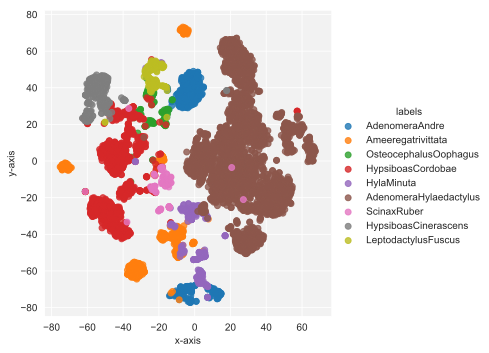

In [10]:
kmeans = KMeans(n_clusters = 20, random_state = 1)
kmeans.fit(X)
prediction= kmeans.predict(X)
    
labels = np.zeros_like(prediction)

for i in range(20):
    mask = (prediction == i)
    labels[mask] = mode(y[mask])[0]

print('Accuracy: ',accuracy_score(y, labels))

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(scaled_transformed)
proj.columns = ["x-axis", "y-axis"]
proj["labels"] = le.inverse_transform(labels)
sns.lmplot("x-axis", "y-axis", hue = "labels", data = proj ,fit_reg=False)


#### TSNE visualization of clusters formed using k-means on scaled data

Accuracy:  0.9325920778318276


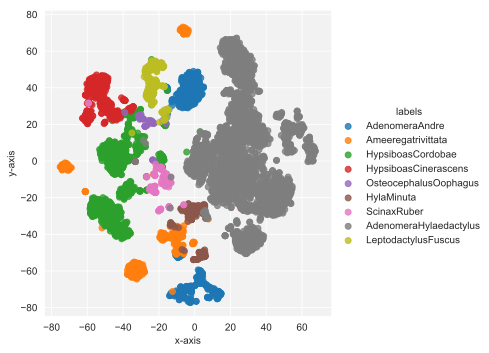

In [11]:
kmeans = KMeans(n_clusters = 33, random_state = 1)
kmeans.fit(X_scaled)
prediction= kmeans.predict(X_scaled)
    
labels = np.zeros_like(prediction)

for i in range(37):
    mask = (prediction == i)
    labels[mask] = mode(y[mask])[0]

print('Accuracy: ',accuracy_score(y, labels))

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(scaled_transformed)
proj.columns = ["x-axis", "y-axis"]
proj["labels"] = le.inverse_transform(labels)
sns.lmplot("x-axis", "y-axis", hue = "labels", data = proj ,fit_reg=False)


#### TSNE visualization of clusters formed using k-means on transformed data

Accuracy:  0.8940931202223766


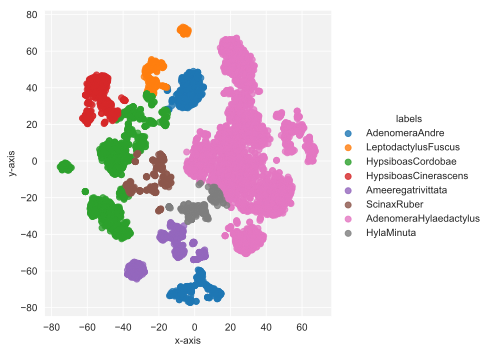

In [12]:
kmeans = KMeans(n_clusters = 18,random_state = 1)
kmeans.fit(scaled_transformed)
tsne_prediction= kmeans.predict(scaled_transformed)

tsne_labels = np.zeros_like(tsne_prediction)
for i in range(36):
    mask = (tsne_prediction == i)
    tsne_labels[mask] = mode(y[mask])[0]
        
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
proj1 = pd.DataFrame(scaled_transformed)
proj1.columns = ["x-axis", "y-axis"]
proj1["labels"] = le.inverse_transform(tsne_labels)
sns.lmplot("x-axis", "y-axis", hue = "labels", data = proj1 ,fit_reg=False)
print("Accuracy: ", accuracy_score(tsne_labels, y))


## Final Conclusion

In all of these cases we couldn't find clusters of Rhinellagranulosa. 
If we look carefully into the graph of visualization of data using tsne, the occurance of Rhinellagranulosa is very small and usually occurs within the area of very large clusters. That is why it is very hard to label them. K-means worked better in high dimensional spaces possibly because in the high dimensional space it was easier to distinguish these rare occurances than in any smaller dimensional space. 
